In [63]:
import numpy as np 
import pandas as pd 

In [64]:
df = pd.read_csv(r'D:\DATASET\iris\iris_csv.csv')

In [65]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [66]:
from sklearn.preprocessing import LabelEncoder 

In [67]:
encoder = LabelEncoder()

In [68]:
df['species'] = encoder.fit_transform(df['species'])

In [69]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [70]:
df = df[df['species'] != 0][['sepal_width' , 'petal_length' , 'species']]

In [71]:
df.head()

,sepal_width,petal_length,species
48,3.2,4.7,1
49,3.2,4.5,1
50,3.1,4.9,1
51,2.3,4.0,1
52,2.8,4.6,1


In [72]:
df.shape

(99, 3)

In [73]:
import seaborn as sns 
import matplotlib.pyplot as plt 

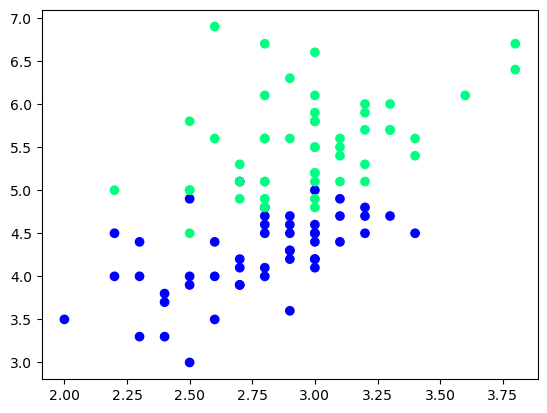

In [74]:
plt.scatter(df['sepal_width'] , df['petal_length'] , c = df['species'] , cmap='winter')

In [75]:
#Taking 10 rows for trainig i.e, subset of data for different models(same algo)
df = df.sample(99, random_state=42)
df_train= df.iloc[:60,:].sample(10,random_state=1)
df_val = df.iloc[60:80,:].sample(5,random_state=2)
df_test = df.iloc[80:,:].sample(5 ,random_state=3)

In [76]:
df_train.head()

,sepal_width,petal_length,species
120,2.8,6.7,2
55,2.4,3.3,1
143,2.5,5.0,2
61,2.9,4.7,1
51,2.3,4.0,1


In [77]:
df_val.head()

,sepal_width,petal_length,species
96,2.5,3.0,1
114,3.0,5.5,2
107,3.6,6.1,2
146,3.0,5.1,2
126,2.8,5.6,2


In [78]:
df_test.head()

,sepal_width,petal_length,species
130,2.8,5.6,2
77,2.6,3.5,1
85,2.3,4.4,1
62,2.9,3.6,1
100,3.0,5.9,2


In [79]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:, -1].values

Case-1 Bagging

In [80]:
#Data for tree 1 
df_bag = df_train.sample(8 , replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:, -1]

df_bag

,sepal_width,petal_length,species
137,3.1,5.4,2
129,3.8,6.4,2
93,3.0,4.2,1
51,2.3,4.0,1
93,3.0,4.2,1
129,3.8,6.4,2
143,2.5,5.0,2
93,3.0,4.2,1


In [81]:
!pip install mlxtend
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions 
from sklearn.metrics import accuracy_score

In [82]:
dt_bag1 = DecisionTreeClassifier()

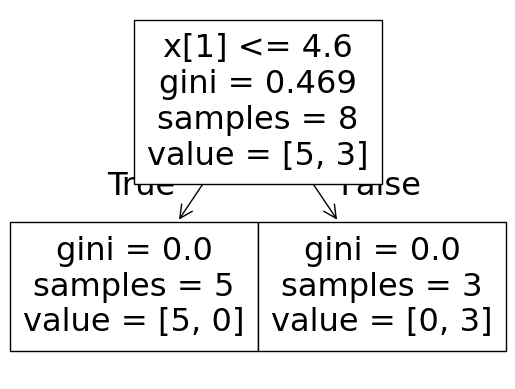

1.0


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


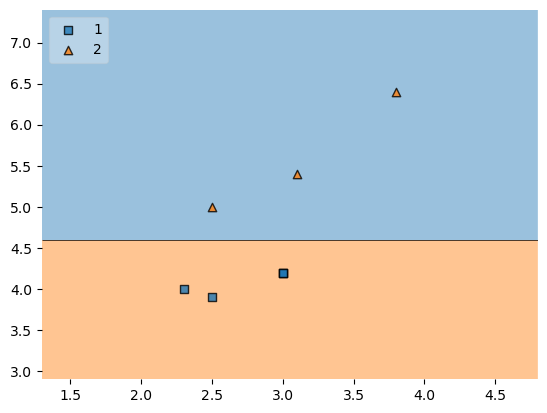

In [94]:
evaluate (dt_bag1, X,y)

In [84]:
#Data for tree 1 
df_bag = df_train.sample(8 , replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:, -1]

df_bag

,sepal_width,petal_length,species
82,3.0,4.5,1
55,2.4,3.3,1
67,2.5,3.9,1
137,3.1,5.4,2
137,3.1,5.4,2
137,3.1,5.4,2
93,3.0,4.2,1
82,3.0,4.5,1


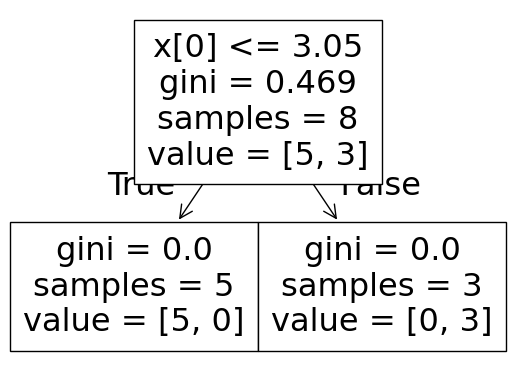

0.4


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


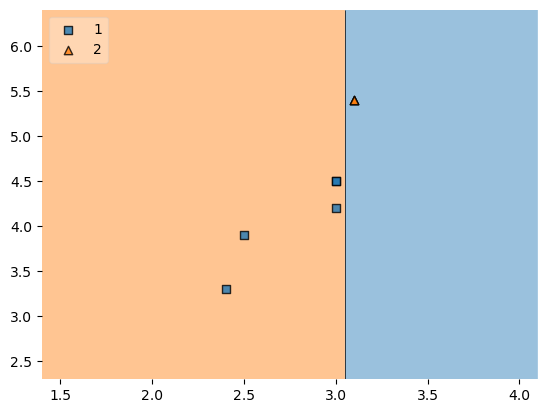

In [87]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2, X,y)

In [88]:
#Data for tree 1 
df_bag = df_train.sample(8 , replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:, -1]

df_bag

,sepal_width,petal_length,species
143,2.5,5.0,2
93,3.0,4.2,1
129,3.8,6.4,2
93,3.0,4.2,1
137,3.1,5.4,2
51,2.3,4.0,1
67,2.5,3.9,1
93,3.0,4.2,1


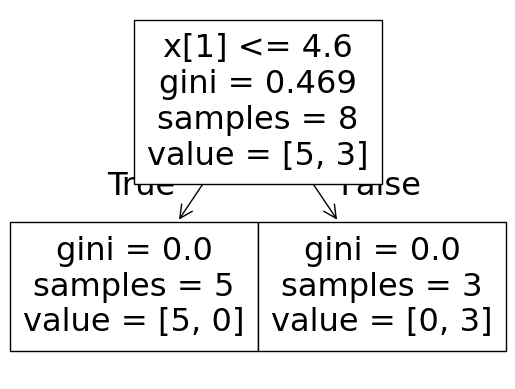

1.0


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


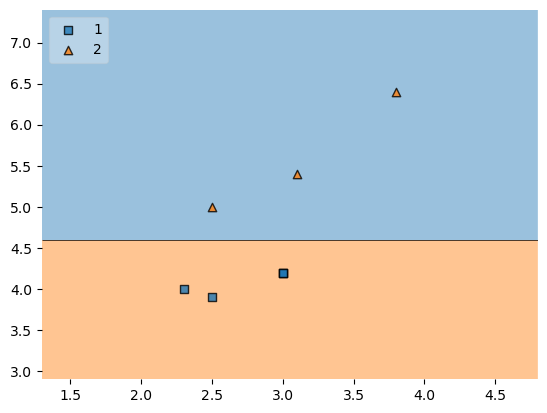

In [89]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3, X,y)

Aggaregation

In [90]:
def evaluate (clf , X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values , y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test , y_pred))

Predict

In [91]:
df_test

,sepal_width,petal_length,species
130,2.8,5.6,2
77,2.6,3.5,1
85,2.3,4.4,1
62,2.9,3.6,1
100,3.0,5.9,2


In [93]:
print('Predictor 1' ,dt_bag1.predict(np.array([2.8,5.6]).reshape(1,2)))
print('Predictor 2' ,dt_bag2.predict(np.array([2.8,5.6]).reshape(1,2)))
print('Predictor 3' ,dt_bag3.predict(np.array([2.8,5.6]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [1]
Predictor 3 [2]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Pasting 

In [95]:
#Row sampling without repalcement 
df_train

,sepal_width,petal_length,species
120,2.8,6.7,2
55,2.4,3.3,1
143,2.5,5.0,2
61,2.9,4.7,1
51,2.3,4.0,1
67,2.5,3.9,1
137,3.1,5.4,2
93,3.0,4.2,1
82,3.0,4.5,1
129,3.8,6.4,2


In [96]:
df.sample(8)

,sepal_width,petal_length,species
56,2.9,4.6,1
51,2.3,4.0,1
126,2.8,5.6,2
142,3.0,5.2,2
102,3.0,5.8,2
137,3.1,5.4,2
57,2.7,3.9,1
69,2.8,4.0,1


Random Subspaces

In [99]:
#Columns sampling with or without colummn sampling 
df1 = pd.read_csv(r'D:\DATASET\iris\iris_csv.csv')
df1 = df1.sample(10)

In [100]:
df1

,sepal_length,sepal_width,petal_length,petal_width,species
93,5.7,3.0,4.2,1.2,versicolor
138,6.7,3.1,5.6,2.4,virginica
36,4.4,3.0,1.3,0.2,setosa
64,5.6,3.0,4.5,1.5,versicolor
134,6.3,3.4,5.6,2.4,virginica
17,5.1,3.5,1.4,0.3,setosa
22,4.6,3.6,1.0,0.2,setosa
7,5.0,3.4,1.5,0.2,setosa
130,6.4,2.8,5.6,2.2,virginica
99,5.8,2.7,5.1,1.9,virginica


In [102]:
df1.sample(2 , replace = True , axis =1)

,species,sepal_length
93,versicolor,5.7
138,virginica,6.7
36,setosa,4.4
64,versicolor,5.6
134,virginica,6.3
17,setosa,5.1
22,setosa,4.6
7,setosa,5.0
130,virginica,6.4
99,virginica,5.8


Random Patches

In [105]:
df1.sample(10).sample(2 , replace = True , axis =1)

,sepal_width,petal_width
138,3.1,2.4
7,3.4,0.2
64,3.0,1.5
36,3.0,0.2
134,3.4,2.4
93,3.0,1.2
17,3.5,0.3
22,3.6,0.2
130,2.8,2.2
99,2.7,1.9
